<a href="https://colab.research.google.com/github/CHANDNI1000/Time-series-analysis/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [3]:
# data_day = pd.read_csv('gemini_BTCUSD_day.csv')
# data_min_2020 = pd.read_csv('gemini_BTCUSD_2020_1min.csv')
# data_min_2021 = pd.read_csv('gemini_BTCUSD_2021_1min.csv')
# data_hr = pd.read_csv('gemini_BTCUSD_1hr.csv')

In [4]:
data_day = pd.read_csv('gemini_BTCUSD_day.csv',skiprows=1)
data_day

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1632283200000,2021-09-22 04:00:00,BTCUSD,42089.88,44047.48,41836.59,43559.58,1051.581492
1,1632196800000,2021-09-21 04:00:00,BTCUSD,42688.03,43655.53,39590.00,42089.88,2962.611037
2,1632110400000,2021-09-20 04:00:00,BTCUSD,45553.62,45837.90,40137.98,42688.03,4373.379477
3,1632024000000,2021-09-19 04:00:00,BTCUSD,47854.23,48333.32,45175.20,45553.62,860.712331
4,1631937600000,2021-09-18 04:00:00,BTCUSD,47962.79,48808.97,47613.93,47854.23,671.356150
...,...,...,...,...,...,...,...,...
2172,1444622400,2015-10-12 04:00:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2173,1444536000,2015-10-11 04:00:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2174,1444449600,2015-10-10 04:00:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2175,1444363200,2015-10-09 04:00:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [5]:
data_day_new = data_day.iloc[:,1:]

In [6]:
data_day_new.describe()

,Open,High,Low,Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000
mean,10542.995126,10880.177984,10181.879421,10562.938989,3394.880237
std,13782.488666,14235.860103,13265.826031,13798.781847,4019.630731
min,0.000000,245.000000,0.000000,243.600000,0.000000
25%,1205.930000,1232.620000,1181.160000,1206.970000,1114.496207
50%,6769.440000,6954.630000,6580.410000,6770.000000,2083.838052
75%,10317.240000,10582.640000,10026.730000,10330.060000,4014.272963
max,63773.180000,64900.000000,62045.000000,63773.180000,54142.433523


Text(0, 0.5, 'Open price')

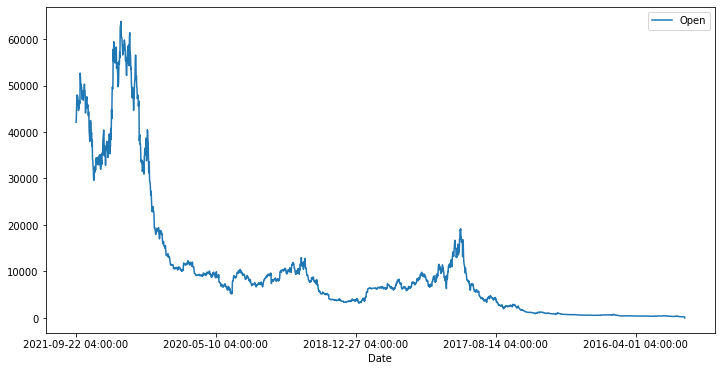

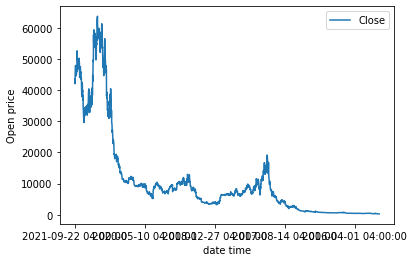

In [7]:
data_day_new.plot(x = 'Date', y = 'Open', figsize = (12,6))
data_day_new.plot(x = 'Date', y = 'Close')
plt.xlabel('date time')
plt.ylabel('Open price')

Getting min and max values


In [8]:
data_day_new.apply(lambda x : x.max())

Date      2021-09-22 04:00:00
Symbol                 BTCUSD
Open                  63773.2
High                    64900
Low                     62045
Close                 63773.2
Volume                54142.4
dtype: object

In [9]:
data_day_new.apply(lambda x : x.min())

Date      2015-10-08 04:00:00
Symbol                 BTCUSD
Open                        0
High                      245
Low                         0
Close                   243.6
Volume                      0
dtype: object

In [10]:
data_day['Date'] = pd.to_datetime(data_day['Date'])

In [11]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unix Timestamp  2177 non-null   int64         
 1   Date            2177 non-null   datetime64[ns]
 2   Symbol          2177 non-null   object        
 3   Open            2177 non-null   float64       
 4   High            2177 non-null   float64       
 5   Low             2177 non-null   float64       
 6   Close           2177 non-null   float64       
 7   Volume          2177 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 136.2+ KB


Getting % of missing values

In [12]:
def calc_percent_NAs(df):
  nans = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)/len(df),columns= ['Percent of missing data'])
  idx = nans['Percent of missing data'] > 0
  return nans[idx]

In [13]:
calc_percent_NAs(data_day)

,Percent of missing data


Getting outliers

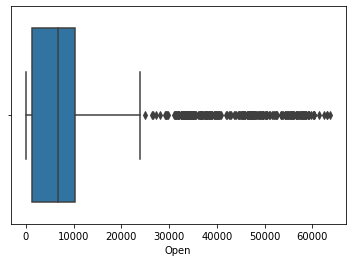

In [14]:
sns.boxplot(x = data_day_new['Open'])
plt.show()

In [17]:
def fences(df,variable_name):
  q1 = df[variable_name].quantile(0.25)
  q3 = df[variable_name].quantile(0.75)
  iqr = q3-q1
  outer_fence = 3 * iqr
  outer_fence_le = q1 - outer_fence
  outer_fence_ue = q3 + outer_fence
  return outer_fence_le,outer_fence_ue

outer_fence_le_open,outer_fence_ue_open = fences(data_day_new,'Open')


In [19]:
outer_fence_ue_open

37651.17

In [22]:
data_day_new['Open'].quantile(0.925)

38893.36

In [20]:
data_day_new_win = data_day_new.copy()

In [24]:
data_day_new_win['Open_wins_95%'] =  winsorize(data_day_new['Open'],limits=(0,0.05))

In [25]:
data_day_new_win.describe

<bound method NDFrame.describe of                      Date  Symbol  ...       Volume  Open_wins_95%
0     2021-09-22 04:00:00  BTCUSD  ...  1051.581492       42089.88
1     2021-09-21 04:00:00  BTCUSD  ...  2962.611037       42688.03
2     2021-09-20 04:00:00  BTCUSD  ...  4373.379477       45553.62
3     2021-09-19 04:00:00  BTCUSD  ...   860.712331       47400.89
4     2021-09-18 04:00:00  BTCUSD  ...   671.356150       47400.89
...                   ...     ...  ...          ...            ...
2172  2015-10-12 04:00:00  BTCUSD  ...    71.047743         248.98
2173  2015-10-11 04:00:00  BTCUSD  ...    22.747091         246.30
2174  2015-10-10 04:00:00  BTCUSD  ...    30.870549         245.51
2175  2015-10-09 04:00:00  BTCUSD  ...    61.587068         243.60
2176  2015-10-08 04:00:00  BTCUSD  ...    34.754703           0.00

[2177 rows x 8 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


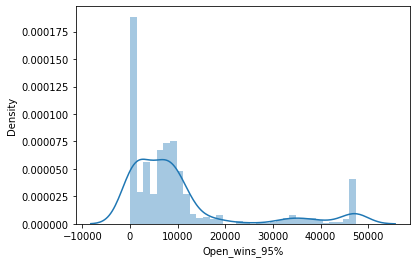

In [28]:
# sns.displot(data_day_new['Open'])
sns.distplot(data_day_new_win['Open_wins_95%'])

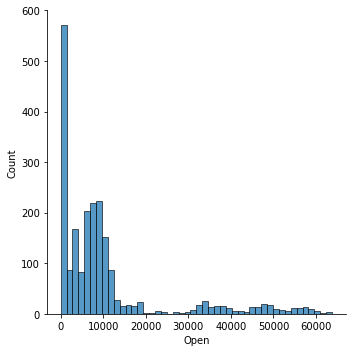

In [29]:
sns.displot(data_day_new['Open'])